## Import Libraries 

In [23]:
import numpy as np # Linear aLgebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read csv)
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## Analysis and visualization

## Aggregated summary of top 100 games

In [28]:
# Sorting and extracting top 100
hundred = df.sort_values('Global_Sales', ascending=False).head(100)

# Changing float format
pd.options.display.float_format = "{:.2f}".format

# Aggregated statistics
hundred[['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales','Global_Sales']].describe()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,100.00,100.00,100.00,100.00,100.00
mean,7.05,4.21,2.05,1.32,14.62
std,5.87,3.51,2.05,1.56,9.94
min,0.98,0.01,0.00,0.08,7.34
25%,3.86,2.31,0.23,0.55,8.97
50%,5.67,3.38,1.64,0.86,11.25
75%,8.29,5.04,3.28,1.62,15.92
max,41.49,29.02,10.22,10.57,82.74


## Global sales per year

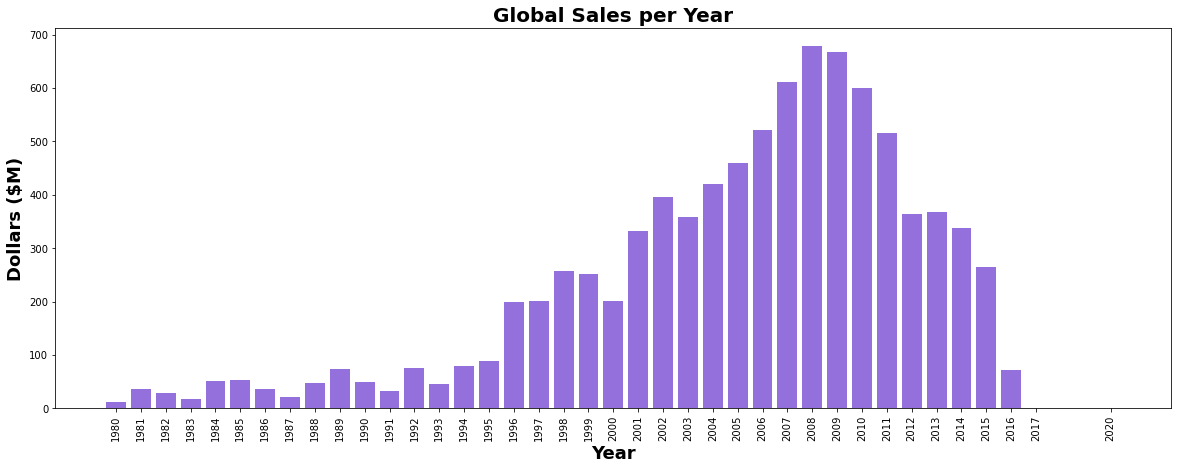

In [29]:
df_year = df.groupby('Year').sum().reset_index(drop=False)

# Plot parameters 
figsize = [20, 7]
x = df_year['Year']
y = df_year['Global_Sales']
width = 0.8
color = 'mediumpurple'

# Bar chart
plt.figure(figsize=figsize)
bars = plt.bar(x, y, 
               width=width, 
               color=color)

# Non-data objects
plt.title('Global Sales per Year', fontdict={'fontweight':'bold', 'fontsize':20})    # A bit of hardcoding
plt.xlabel('Year', fontdict={'fontsize':18, 'fontweight':'bold'})
plt.ylabel('Dollars ($M)', fontdict={'fontsize':18, 'fontweight':'bold'})
plt.xticks(df_year['Year'], rotation = 90)

plt.show()

## Popularity of genres

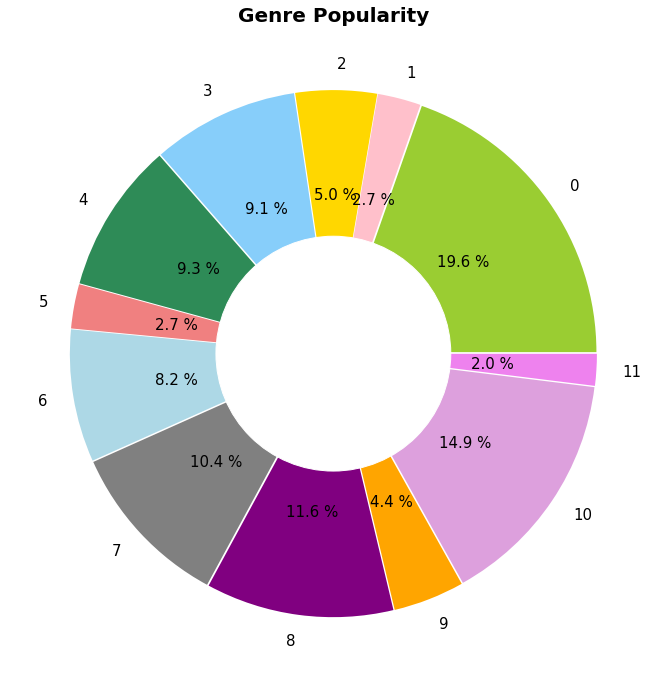

In [30]:
# Summary by genre
df_genre = df.groupby('Genre').sum().reset_index(drop=False)

# Plot parameters
figsize = [12, 12]
x = [i for i in df_genre['Global_Sales']]
labels = [i for i in df_genre['Genre']]
colors = ['yellowgreen','pink','gold','lightskyblue','seagreen','lightcoral','lightblue',
          'grey', 'purple', 'orange','plum','violet','magenta','cyan']
explode = [0.05 if df_genre['Genre'][i] in ['Action', 'Sports', 'Shooter'] else    # List comprehension
           0.08 if df_genre['Genre'][i] in ['Strategy', 'Puzzle', 'Adventure'] else 
           0.01 for i in range(len(df_genre['Genre']))]
autopct = '%.1f %%'
textprops = {'fontsize': 15}

# Pie chart
plt.figure(figsize=figsize)
plt.pie(x, 
        labels=labels, 
        colors=colors,
        autopct=autopct, 
        explode=explode,
        textprops=textprops)

# Make a hole, so it's a donut
my_circle=plt.Circle((0,0), 0.45, color='white')    # (0,0) - coordinated of the center, 0.45 - diameter
p=plt.gcf()
p.gca().add_artist(my_circle)

# Non-data objects
plt.title('Genre Popularity', fontdict={'fontweight':'bold', 'fontsize':20})

plt.show()

## Platform

In [33]:
# Grouping sales by platform
platform = df[['Platform', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Global_Sales']]
platform = platform.groupby('Platform').sum().sort_values('Global_Sales', ascending=False).reset_index(drop=False).head(10)
platform.style.set_properties(**{'background-color': 'turquoise'}, subset=['Global_Sales'])    # Highlight c column
# PS2
# X360
# PS3
# Wii
# DS
# PS
# GBA
# PSP
# PS4
# PC

,Platform,NA_Sales,EU_Sales,JP_Sales,Global_Sales
0,16,583.840000,339.290000,139.200000,1255.640000
1,28,601.050000,280.580000,12.430000,979.960000
2,17,392.260000,343.710000,79.990000,957.840000
3,26,507.710000,268.380000,69.350000,926.710000
4,4,390.710000,194.650000,175.570000,822.490000
5,15,336.510000,213.600000,139.820000,730.660000
6,6,187.540000,75.250000,47.330000,318.500000
7,19,108.990000,68.250000,76.790000,296.280000
8,18,96.800000,123.700000,14.300000,278.100000
9,13,93.280000,139.680000,0.170000,258.820000


## Publishers

In [36]:
# Grouping sales by genre
publishers = df[['Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Global_Sales']]
publishers = publishers.groupby('Publisher').sum().sort_values('Global_Sales', ascending=False).reset_index(drop=False).head(10)
publishers.style.set_properties(**{'background-color': 'lightgreen'}, subset=['Global_Sales'])    # Highlight a column
# Nintendo
# Electronic Arts
# Activision
# Sony Computer Entertainment
# Ubisoft
# Take-Two Interactive
# THQ
# Konami Digital Entertainment
# Sega
# Namco Bandai Games

,Publisher,NA_Sales,EU_Sales,JP_Sales,Global_Sales
0,359,816.870000,418.740000,455.420000,1786.560000
1,138,595.070000,371.270000,14.040000,1110.320000
2,21,429.700000,215.530000,6.540000,727.460000
3,456,265.220000,187.720000,74.100000,607.500000
4,525,253.430000,163.320000,7.500000,474.720000
5,494,220.490000,118.140000,5.830000,399.540000
6,488,208.770000,94.730000,5.010000,340.770000
7,275,92.160000,69.690000,91.300000,283.640000
8,446,109.400000,82.000000,57.030000,272.990000
9,347,69.520000,42.630000,127.070000,254.090000


## Exploratory Data Analysis for Video Game Sales Price Prediction

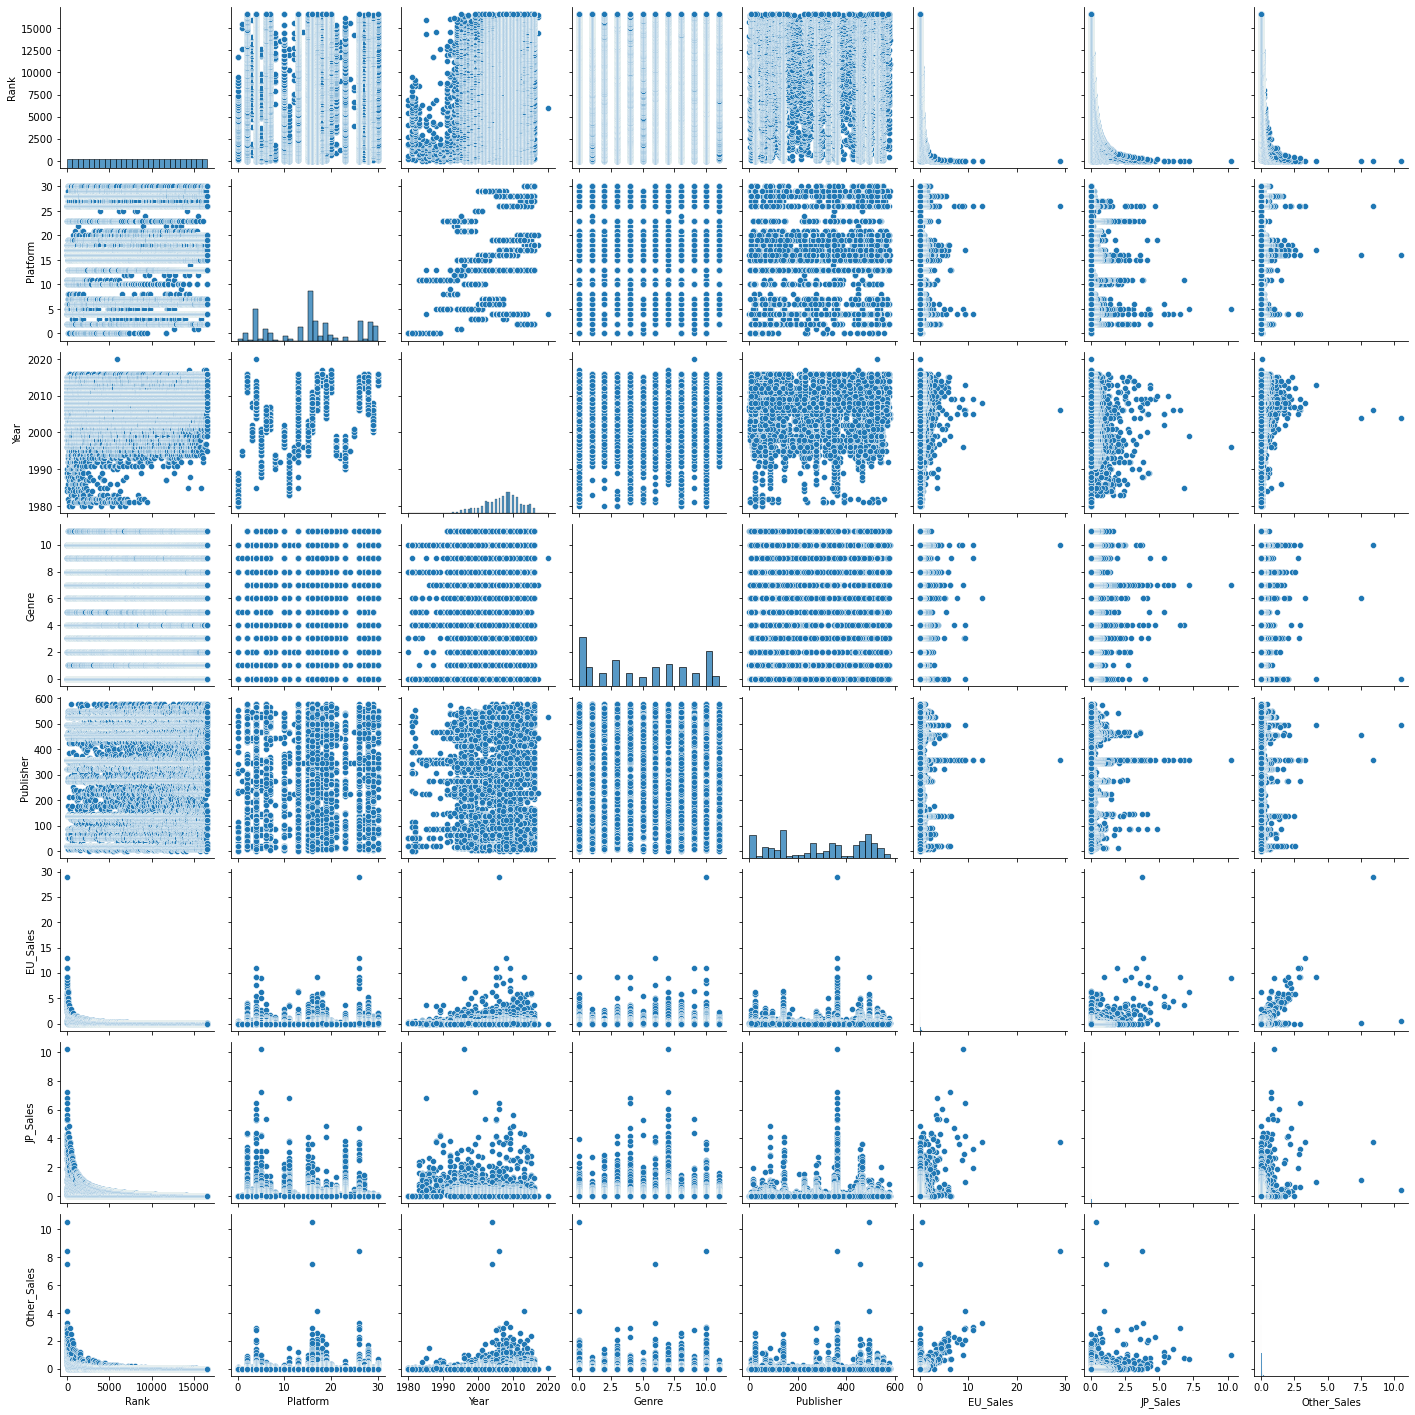

In [68]:
sns.pairplot(df)

<AxesSubplot:>

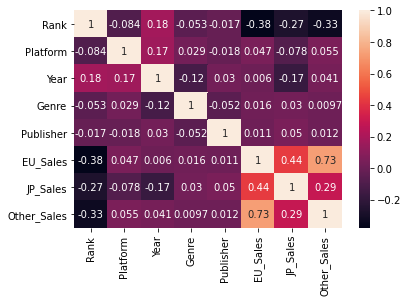

In [69]:
sns.heatmap(df.corr(), annot=True)

## Start

In [9]:
df = pd.read_csv(r"C:\Users\Waseem\Dropbox\My PC (LAPTOP-VOTIE9IN)\Downloads\Video Game Sales Prediction\vgsales.csv")
#using LabeLEncoder convert categorical data into numericaL data
number = LabelEncoder()
df['Platform'] = number.fit_transform(df['Platform'].astype('str'))
df['Genre'] = number.fit_transform(df['Genre'].astype('str'))
df['Publisher'] = number.fit_transform(df['Publisher'].astype('str'))

dff = df.drop(['Rank', 'Name', 'Year'], axis=1)
df3 = dff.drop(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], axis=1)

 # coLumns = ["Platform", "Genre", "PubLisher"]
 # coLumns = ["Platform", "Genre", "PubLisher", "NA_SaLes", "EU SaLes"]
columns = ["Platform", "Genre", "Publisher", "NA_Sales", "EU_Sales"]

In [10]:
labels = df3['Global_Sales'].values 
features = dff[list(columns)].values 
X = features 
y = labels 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30) 
scaler = StandardScaler() 
# scaler = preprocessing.MinMaxScaLer() 
# Fit onLy on training data
scaler.fit(X_train)
X_train = scaler.transform(X_train)
# appLy some transformation to test data 
X_test = scaler.transform(X_test)

## Linear Regression

In [25]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
Accuracy = regr.score(X_train, y_train)
print("LinearRegression Accuracy in the training data: ", Accuracy * 100, "%")
accuracy = regr.score(X_test, y_test)
print("LinearRegression Accuracy in the test data", accuracy * 100, "%")

LinearRegression Accuracy in the training data:  96.97609789531778 %
LinearRegression Accuracy in the test data 94.99638342653796 %


## Gradient Boosting Regressor

In [26]:
from sklearn.ensemble import GradientBoostingRegressor
M= GradientBoostingRegressor()
M.fit(X_train, y_train)
Accuracy = M.score(X_train, y_train)
print("GradientBoostingRegressor Accuracy in the training data: ", Accuracy * 100, "%")
accuracy = M.score(X_test, y_test)
print("GradientBoostingRegressor Accuracy in the test data: ", accuracy * 100, "%")

GradientBoostingRegressor Accuracy in the training data:  98.55718175890237 %
GradientBoostingRegressor Accuracy in the test data:  95.76507574073827 %


## Decision Tree Regressor

In [13]:
from sklearn.tree import DecisionTreeRegressor 
M2=DecisionTreeRegressor() 
M2.fit(X_train, y_train) 
Accuracy = M2.score(X_train, y_train) 
print("DecisionTreeRegressor Accuracy in the training data: ", Accuracy * 100, "%")
accuracy = M2.score(X_test, y_test) 
print("DecisionTreeRegressor Accuracy in the test data", accuracy * 100, "%")

DecisionTreeRegressor Accuracy in the training data:  99.79013398677436 %
DecisionTreeRegressor Accuracy in the test data 91.31346909930971 %


## Random Forest Regressor

In [14]:
from sklearn.ensemble import RandomForestRegressor 
M3 = RandomForestRegressor() 
M3.fit(X_train, y_train)
Accuracy = M3.score(X_train, y_train) 
print("RandomForestRegressor Accuracy in the training data: ", Accuracy * 100, "%") 
accuracy = M3.score(X_test, y_test) 
print("RandomForestRegressor Accuracy in the test data: ", accuracy * 100, "%")

RandomForestRegressor Accuracy in the training data:  98.16018201110884 %
RandomForestRegressor Accuracy in the test data:  94.97694312584413 %


## Support Vector Regressor

In [15]:
from sklearn.svm import SVR 
M4 = SVR()
M4.fit(X_train, y_train)
Accuracy = M4.score(X_train, y_train)
print("Support Vector Regression Accuracy in the training data: ", Accuracy * 100, "%")
accuracy = M4.score(X_test, y_test)
print("Support Vector Regression Accuracy in the test data", accuracy * 100, "%")

Support Vector Regression Accuracy in the training data:  57.0677485319846 %
Support Vector Regression Accuracy in the test data 66.55793023420603 %


## KNeighbors Regressor

In [16]:
from sklearn.neighbors import KNeighborsRegressor
M5 = KNeighborsRegressor()
M5.fit(X_train, y_train)
Accuracy = M5.score(X_train, y_train)
print("KNeighborsRegressor Accuracy in the training data: ", Accuracy * 100, "%")
accuracy = M5.score(X_test, y_test)
print("KNeighborsRegressor Accuracy in the test data", accuracy * 100, "%")

KNeighborsRegressor Accuracy in the training data:  92.48347621209707 %
KNeighborsRegressor Accuracy in the test data 94.53277366149526 %


## Models Comparison(Train prediction)

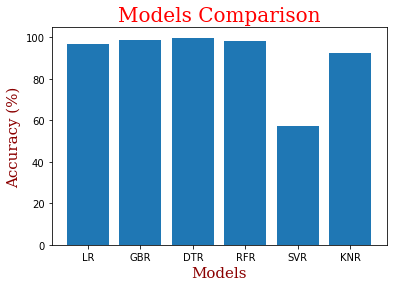

In [67]:
x = np.array(["LR", "GBR", "DTR", "RFR","SVR","KNR"])
y = np.array([96.97609789531778 , 98.55718175890237 , 99.79013398677436 , 98.16018201110884 , 57.0677485319846 , 92.48347621209707 ])
     
font1 = {'family':'serif','color':'red','size':20}
font2 = {'family':'serif','color':'darkred','size':15}
plt.title("Models Comparison", fontdict = font1) 
plt.ylabel("Accuracy (%)", fontdict = font2)
plt.xlabel("Models", fontdict = font2)
plt.bar(x,y) 
plt.show()

## Models Comparison(Test prediction)

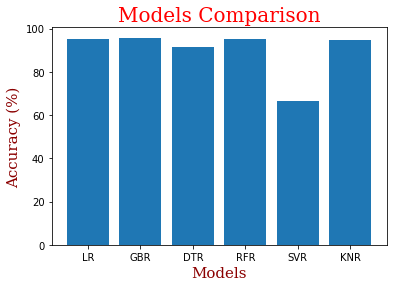

In [66]:
x = np.array(["LR", "GBR", "DTR", "RFR","SVR","KNR"])
y = np.array([94.99638342653796 , 95.76507574073827 , 91.31346909930971 , 94.97694312584413 , 66.55793023420603 , 94.53277366149526 ])
     
font1 = {'family':'serif','color':'red','size':20}
font2 = {'family':'serif','color':'darkred','size':15}
plt.title("Models Comparison", fontdict = font1) 
plt.ylabel("Accuracy (%)", fontdict = font2)
plt.xlabel("Models", fontdict = font2)
plt.bar(x,y) 
plt.show()